# Generating a map of Global Horizontal Irradiation (GHI) in Brazil

## In this code, GHI data has been downloaded from the Brazilian National Institute for Space Research (INPE), and used to generate a map of GHI along the Brazilian territory

### First step: download shapefile data from INPE's Solar Atlas project

Import the libraries needed for this task. Since we are going to scrape INPE's website to get the data, `BeautifulSoup` and `requests`. The downloaded data is in .zip format, so the `zipfile` library is also necessary.

In [1]:
from bs4 import BeautifulSoup
import requests
from zipfile import ZipFile

Connect to INPE's Solar Atlas website, then generate a soup object

In [2]:
labren_url = 'http://labren.ccst.inpe.br/atlas_2017.html#mod'
r = requests.get(labren_url) 
soup = BeautifulSoup(r.text, "html.parser") 
type(soup)

bs4.BeautifulSoup

Now list the available links within the website

In [3]:
for link in soup.find_all('a'):
    print(link.get('href'))

./index.html
http://sonda.ccst.inpe.br/
pesquisa.html
producao.html
equipe.html
parcerias.html
contato.html
http://inpe.br/ouvidoria
atlas_2017-en.html
atlas_2017-es.html
http://urlib.net/rep/8JMKD3MGP3W34P/3PERDJE
./imgs/ilustr/logos/Logo_LABREN_sem_descricao_fundo_transp.png
./imgs/ilustr/logos/Logo_DIIAV.png
./imgs/ilustr/logos/Logo_INPE_2020.png
./projetos/atlas_2017/atlas_solar_2017_metadados.pdf
./atlas_2017_ajuda.html
#mod
#mod
#mod
#mod
./atlas_2017_BA.html
./atlas_2017_PA.html
./atlas_2017_RJ.html
./atlas_2017_SP.html
./atlas_2017_ES.html
./atlas_2017_PB.html
./atlas_2017_PE.html
./atlas_2017_AL.html
./atlas_2017_SE.html
./atlas_2017_PI.html
./atlas_2017_MA.html
./atlas_2017_MG.html
./atlas_2017_SC.html
./atlas_2017_PR.html
./atlas_2017_GO.html
./atlas_2017_MT.html
./atlas_2017_MS.html
./atlas_2017_DF.html
./atlas_2017_RN.html
./atlas_2017_RR.html
./atlas_2017_CE.html
./atlas_2017_TO.html
./atlas_2017_AP.html
./atlas_2017_RS.html
./atlas_2017_AC.html
./atlas_2017_AM.html
./atl

Within the above list, we need the specific shapefiles available from the `'./projetos/atlas_2017/GLOBAL_HORIZONTAL_(shp).zip'` link. 

Now it is time to download the shapefiles.

In [4]:
# Get full download url and connect
zip_file_url = requests.compat.urljoin(labren_url,'/projetos/atlas_2017/GLOBAL_HORIZONTAL_(shp).zip')
r = requests.get(zip_file_url, stream = True)

# Get the file name
zip_file_name = zip_file_url.split('/')[-1]

# Write file then close
with open(zip_file_name, 'wb') as fd:        
    for chunk in r.iter_content(chunk_size=1024):
        fd.write(chunk)
    fd.close()

Use the `zipfile` library to extract shapefiles and get the names of the resulting files

In [5]:
# Extract files
with ZipFile(zip_file_name, 'r') as zip:
      
    print('Extracting files...')
    zip.extractall()
    zip.printdir
    print('Done!')

# Get file names
dirlist = zip.namelist()
print(dirlist)

Extracting files...
Done!
['GLOBAL_HORIZONTAL/', 'GLOBAL_HORIZONTAL/atlas_solar_2017_metadados.pdf', 'GLOBAL_HORIZONTAL/global_horizontal_means.dbf', 'GLOBAL_HORIZONTAL/global_horizontal_means.prj', 'GLOBAL_HORIZONTAL/global_horizontal_means.shp', 'GLOBAL_HORIZONTAL/global_horizontal_means.shx']


### Now that the shapefile is available, it is time to read and process them

Import the `geopandas` library to read and process the extracted shapefile. The `matplotlib` library is also necessary for plotting of the data. Once all libraries have been imported, read and describe the shapefile

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

shpdata = gpd.read_file(dirlist[4])
shpdata.describe()

,ID,LON,LAT,ANNUAL,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000,72272.00000,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000,72272.000000
mean,36136.500000,-53.086605,-10.787016,4911.835413,5090.874848,5126.087268,4861.94493,4607.652078,4292.398924,4307.083974,4477.111412,5112.155219,5234.505936,5311.681080,5272.684373,5247.896765
std,20863.273665,8.665313,8.143224,427.880628,778.690154,703.499743,531.47958,470.883091,584.810167,684.398971,694.266040,642.921853,625.057026,484.782913,569.662241,770.832317
min,1.000000,-73.949000,-33.700500,3594.000000,3723.000000,3749.000000,3787.00000,3327.000000,2536.000000,2137.000000,2216.000000,2870.000000,3060.000000,3457.000000,4148.000000,3962.000000
25%,18068.750000,-59.149000,-16.300500,4565.000000,4364.000000,4475.000000,4361.00000,4243.000000,3920.000000,4077.000000,4192.000000,4841.000000,4946.000000,4977.000000,4796.000000,4517.750000
50%,36136.500000,-52.649000,-9.400500,4838.000000,4992.000000,5030.000000,4848.00000,4566.000000,4267.000000,4418.000000,4526.000000,5102.000000,5130.000000,5211.000000,5124.000000,5168.000000
75%,54204.250000,-46.649000,-4.700500,5194.000000,5769.250000,5770.000000,5267.00000,4965.000000,4744.000000,4778.000000,4961.000000,5526.000000,5505.000000,5531.000000,5693.000000,5923.000000
max,72272.000000,-34.749000,5.299500,6120.000000,7097.000000,6879.000000,6424.00000,5976.000000,5618.000000,5552.000000,5829.000000,6543.000000,6830.000000,6749.000000,6868.000000,7277.000000


The columns in the file contain data on longitude and latitude, as well as averages of global horizontal irradiation (GHI). The 'Annual' column contains the yearly average of the daily total GHI, in Wh/m²/day. The following columns ('Jan' to  'Dec') contain the monthly averages of the daily total GHI, also in Wh/m²/day. 

Our goal is to get the yearly averages of GHI along the Brazilian territory, so the following lines generate a plot for the 'Annual' column in `shpdata`.

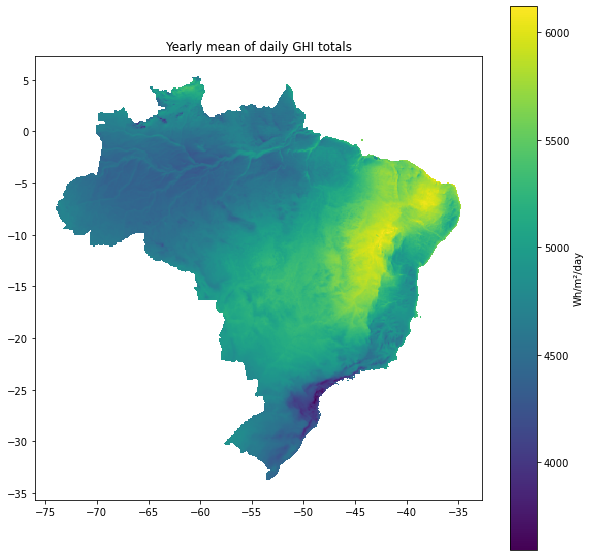

In [7]:
%%capture --no-display 

fig, ax = plt.subplots(1,1,figsize=(10,10))

plt.title('Yearly mean of daily GHI totals')

shpdata.plot(column='ANNUAL', 
             ax=ax, 
             legend=True,
             legend_kwds={'label': "Wh/m²/day"})

plt.savefig('BR_GHI_map.png')